# Establishment and Visualization of AI Models for Carbon Emission Estimation

### Loading the Dataset

In [6]:
# Import necessary libraries
import pandas as pd

# Define the file path to your dataset
file_path = r"D:\Ibrahim\Masters\AY2425 - Sem 1\Project\CO2EmissionProject\CO2\data\merged_dataset.csv"

# Load the dataset
df = pd.read_csv(file_path, low_memory=False)

# Display the first few rows of the dataset
df.head()


,IMO,Name,Ship type,Reporting Period,Technical efficiency,Port of Registry,Home Port,Ice Class,DoC issue date,DoC expiry date,...,draught,year_built,gross_tonnage,deadweight,summer_deadweight,engine_type,engine_model,engine_power,max_speed,avg_speed
0,6703343,EQUALITY,Other ship types,2021,EIV (57.84 gCO₂/t·nm),Beirut,NaN,NaN,01/06/2022,30/06/2023,...,5.6 m,1966.0,6542.0,2045.0,2045,NaN,NaN,NaN,12.4,9.9
1,7037806,IONIAN STAR,Ro-pax ship,2021,EIV (19.4 gCO₂/t·nm),PANAMA,PANAMA,NaN,29/04/2022,30/06/2023,...,5.2 m,1971.0,9149.0,1968.0,1968,NaN,NaN,NaN,11.8,10.9
2,7043843,TALOS,Ro-ro ship,2021,EIV (48.71 gCO₂/t·nm),Piraeus,Piraeus,NaN,28/04/2022,30/06/2023,...,4.2 m,1971.0,7171.0,2838.0,2838,NaN,NaN,NaN,13.9,13.9
3,7128332,SEA WIND,Ro-pax ship,2021,EIV (9.29 gCO₂/t·nm),Tallinn,Tallinn,IB,20/04/2022,30/06/2023,...,NaN,1972.0,15879.0,4000.0,4000,NaN,NaN,NaN,NaN,NaN
4,7226952,FJARDVAGEN,Ro-ro ship,2021,EIV (43 gCO₂/t·nm),Mariehamn,Mariehamn,IA,28/04/2022,30/06/2023,...,3.8 m,1972.0,6040.0,2566.0,2566,NaN,NaN,NaN,14.7,13.9


Load the dataset using Pandas' `read_csv()` function. 
The dataset contains information on various ship types, their fuel consumption, CO₂ emissions, and other related parameters. 
The `low_memory=False` parameter is used to ensure that Pandas processes the file efficiently, especially for large datasets with mixed data types.

The `df.head()` command is used to display the first five rows of the dataset.


### Checking for Missing Values

In [7]:
# Checking for missing values (NaN) across all columns
print("\nMissing values per column:")
print(df.isna().sum())



Missing values per column:
IMO                        0
Name                       0
Ship type                  0
Reporting Period           0
Technical efficiency       0
                        ... 
engine_type             7641
engine_model            8497
engine_power            7649
max_speed               2085
avg_speed               2085
Length: 76, dtype: int64


To check for missing values in the dataset, the `isna().sum()` function is used. 
This function returns the number of missing (NaN) values in each column, which is allows the identification of columns that may need cleaning or imputation before further analysis.


### Displaying Data Types

In [8]:
# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)



Data types of each column:
IMO                      int64
Name                    object
Ship type               object
Reporting Period         int64
Technical efficiency    object
                         ...  
engine_type             object
engine_model            object
engine_power            object
max_speed               object
avg_speed               object
Length: 76, dtype: object


It's important to understand the data types of each column to ensure that the values align with our expectations (e.g., numeric columns should not contain strings). 
`df.dtypes` function used to display the data types of all columns in the dataset.


### Summary Statistics for Numeric Columns

In [9]:
# Display summary statistics (for numeric columns)
print("\nSummary statistics for numeric columns:")
print(df.describe())



Summary statistics for numeric columns:
                IMO  Reporting Period  Total fuel consumption [m tonnes]  \
count  1.222400e+04           12224.0                       12224.000000   
mean   9.485026e+06            2021.0                        3295.603484   
std    2.797550e+05               0.0                        4171.039026   
min    6.703343e+06            2021.0                           0.000000   
25%    9.323560e+06            2021.0                         989.775000   
50%    9.478620e+06            2021.0                        1909.465000   
75%    9.701789e+06            2021.0                        3680.607500   
max    9.924912e+06            2021.0                       49198.200000   

       Fuel consumptions assigned to On laden [m tonnes]  \
count                                        1921.000000   
mean                                         2289.182343   
std                                          3158.434663   
min                               

Summary statistics provide an overview of the distribution of the numeric columns, such as mean, standard deviation, and quartiles. 
Using `df.describe()`, summary statistics is generated for all numeric columns to gain insights into the central tendencies and variability within the data.


### Visualizing Missing Values with a Heatmap

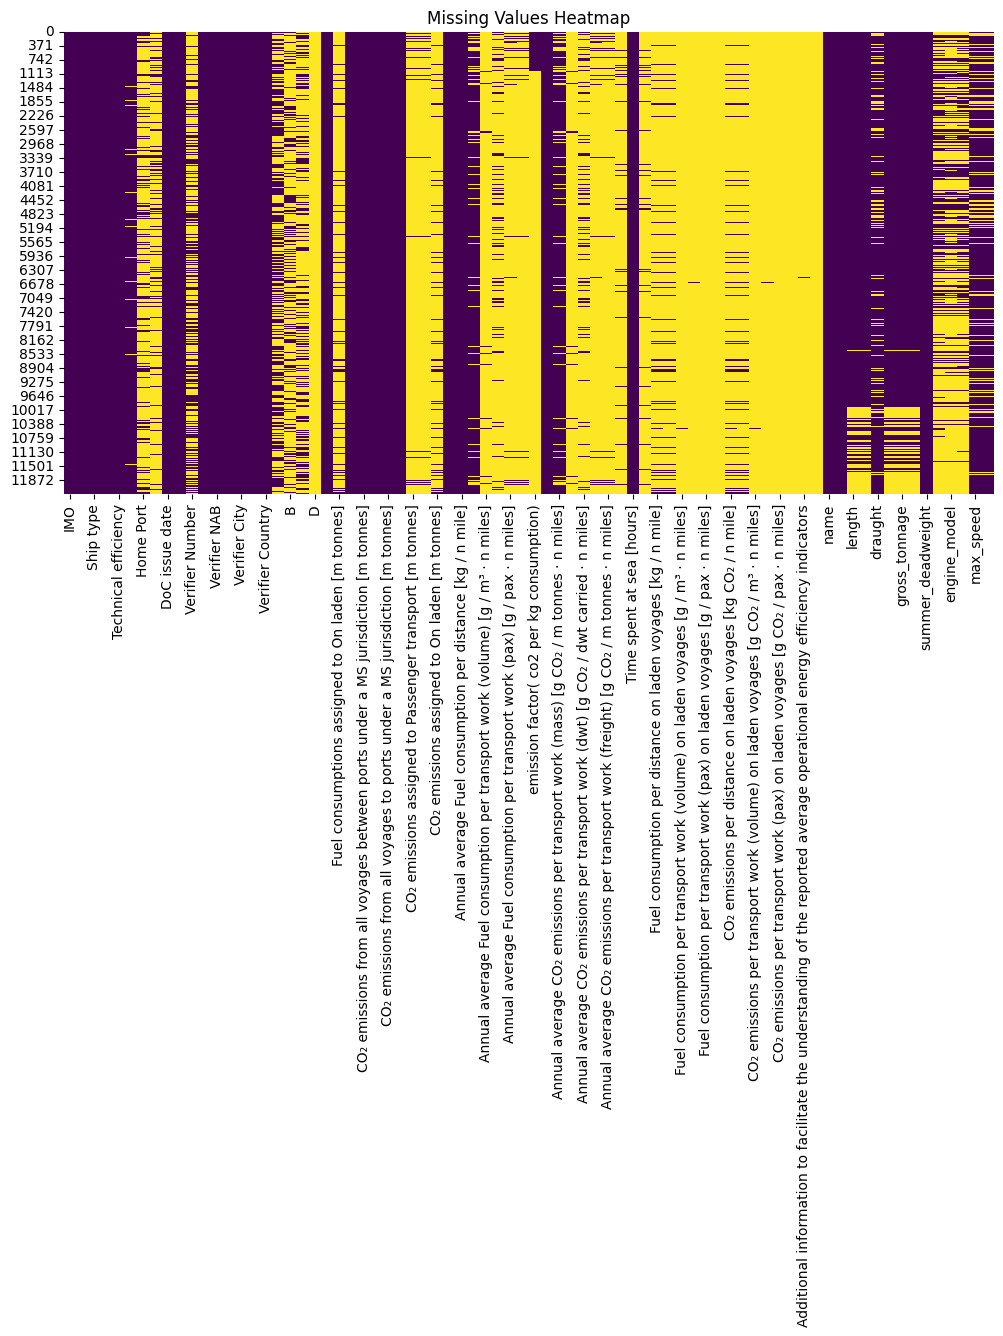

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


A heatmap can help us visualize the distribution of missing values across the dataset. By using Seaborn's `heatmap()` function, we create a plot where missing values are represented in a distinct color. This visualization helps us easily identify patterns of missing data across the columns.

### Selecting Numeric Columns and Correlation Matrix

In [11]:
# Select only the numeric columns from the dataset
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix for numeric columns
print("\nCorrelation matrix:")
corr_matrix = numeric_df.corr()
print(corr_matrix)



Correlation matrix:
                                                         IMO  \
IMO                                                 1.000000   
Reporting Period                                         NaN   
Total fuel consumption [m tonnes]                  -0.074811   
Fuel consumptions assigned to On laden [m tonnes]  -0.063202   
Total CO₂ emissions [m tonnes]                     -0.079495   
CO₂ emissions from all voyages between ports un... -0.156776   
CO₂ emissions from all voyages which departed f...  0.010410   
CO₂ emissions from all voyages to ports under a...  0.044917   
CO₂ emissions which occurred within ports under... -0.067189   
CO₂ emissions assigned to Passenger transport [...  0.180612   
CO₂ emissions assigned to Freight transport [m ...  0.275280   
CO₂ emissions assigned to On laden [m tonnes]      -0.068130   
Annual Time spent at sea [hours]                   -0.155693   
Through ice [n miles]                               0.057937   
Time spent at sea [

To focus on numeric data, we filter the dataset to include only columns of type `float64` and `int64`. Once we have a DataFrame with numeric columns, we compute the correlation matrix using `corr()`. The correlation matrix helps us identify relationships between numeric variables, showing how strongly one variable is related to another.


### Visualizing Correlation Matrix with a Heatmap

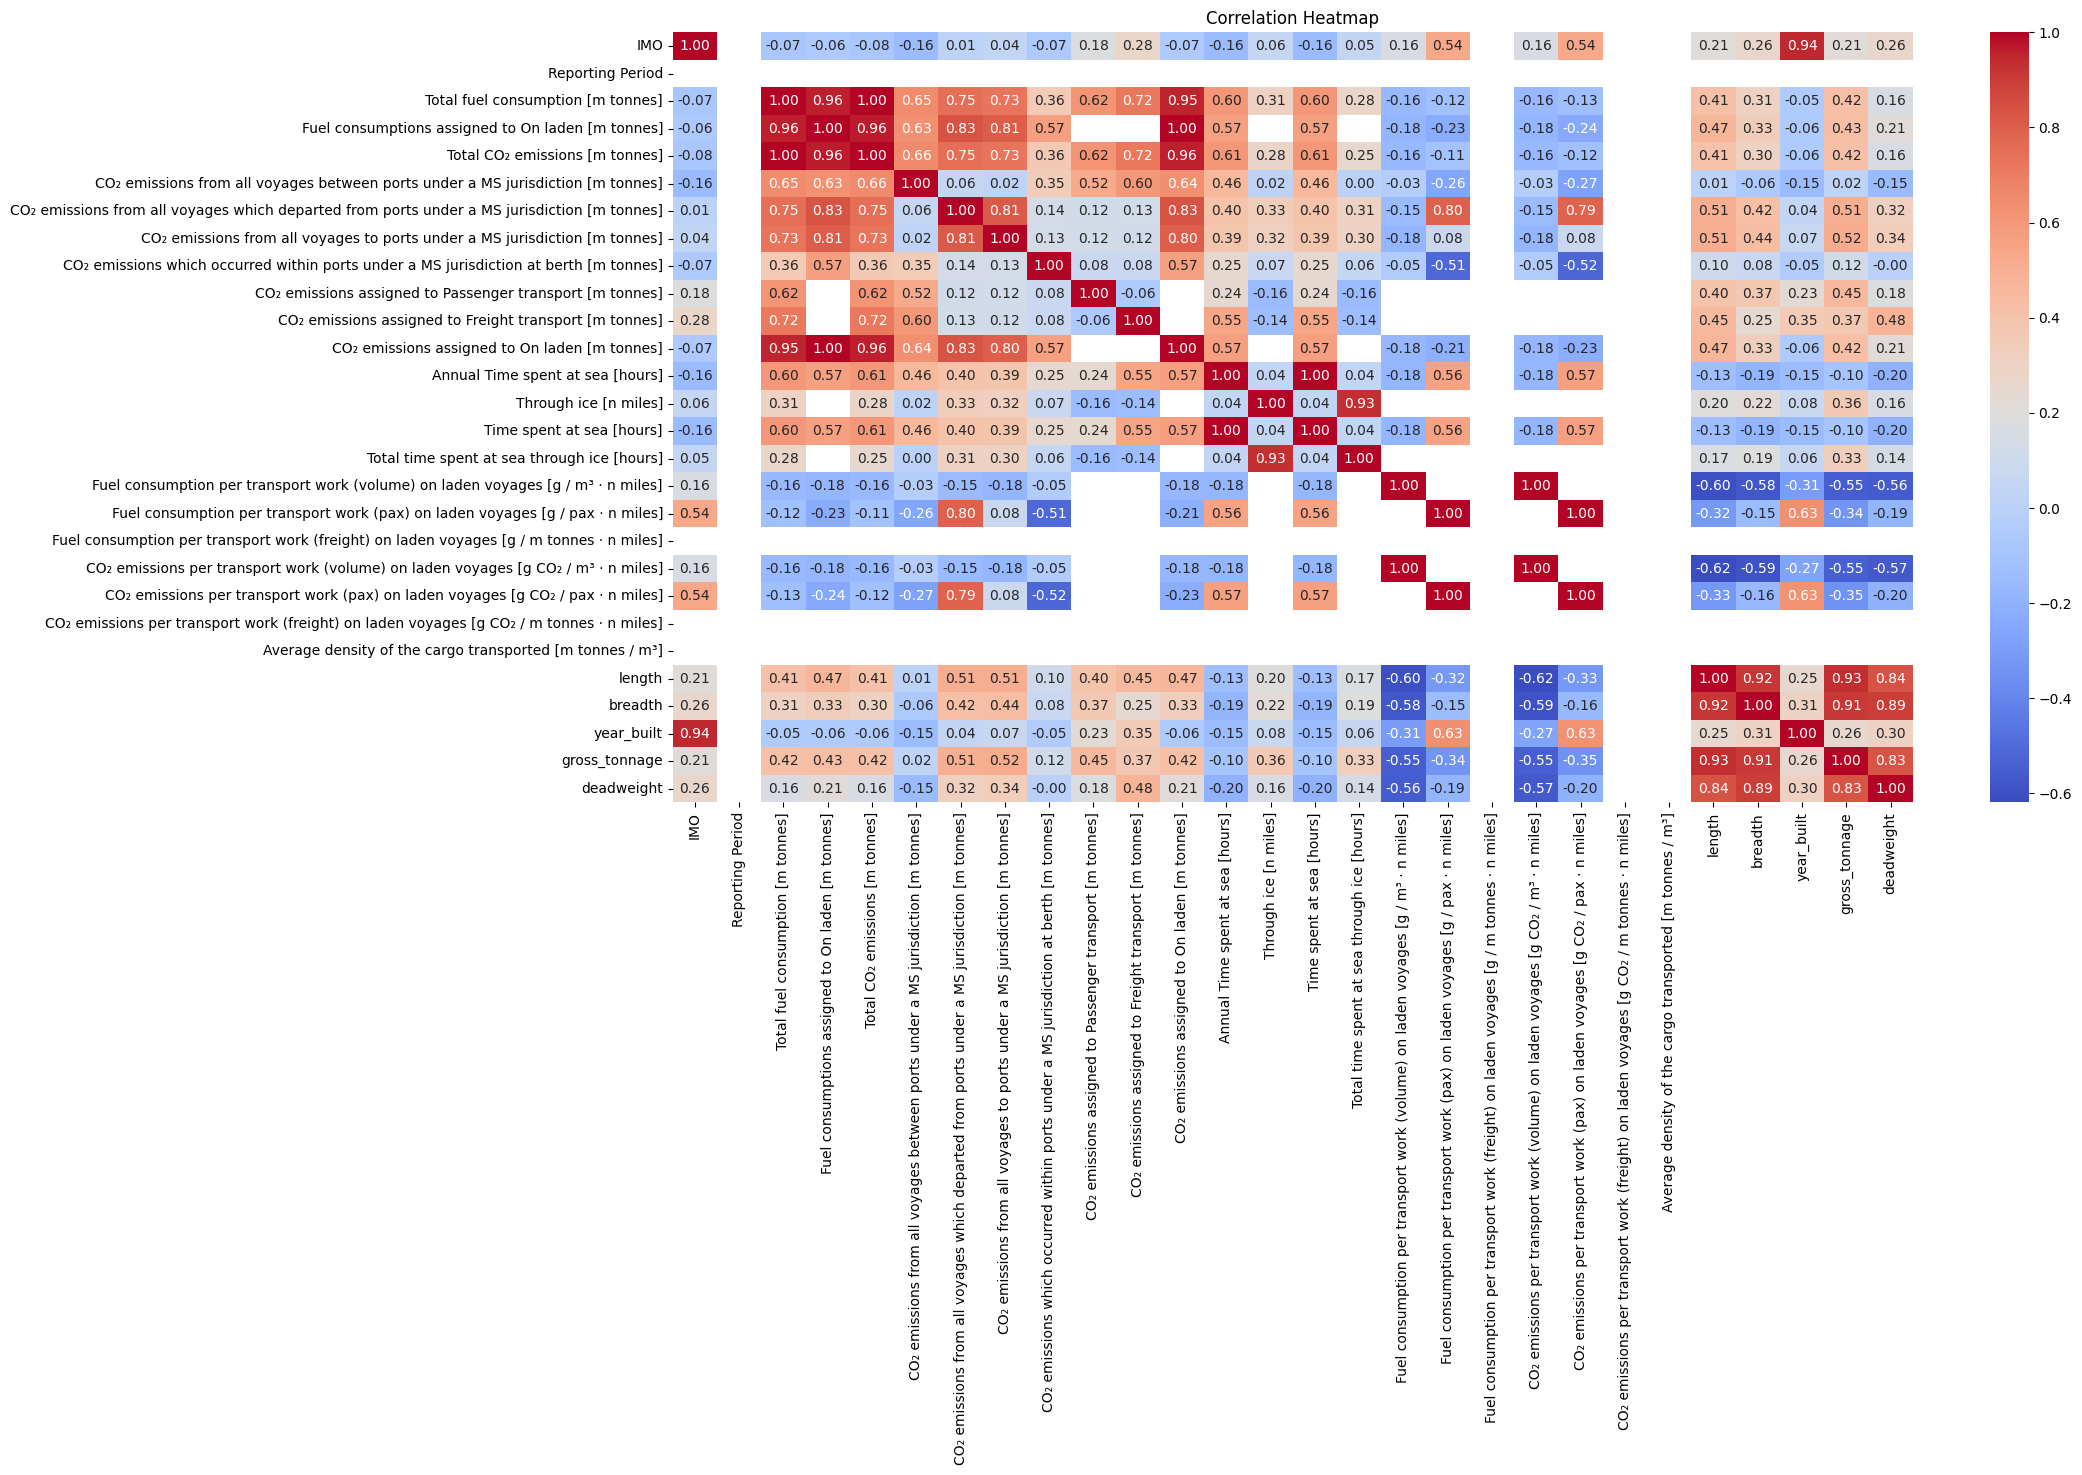

In [12]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


The correlation matrix can be visualized using a heatmap to easily spot strong or weak correlations between numeric columns. Positive correlations are marked in shades of blue, while negative correlations are marked in shades of red. We use Seaborn's `heatmap()` function to generate this plot.


### Histogram of Fuel Consumption


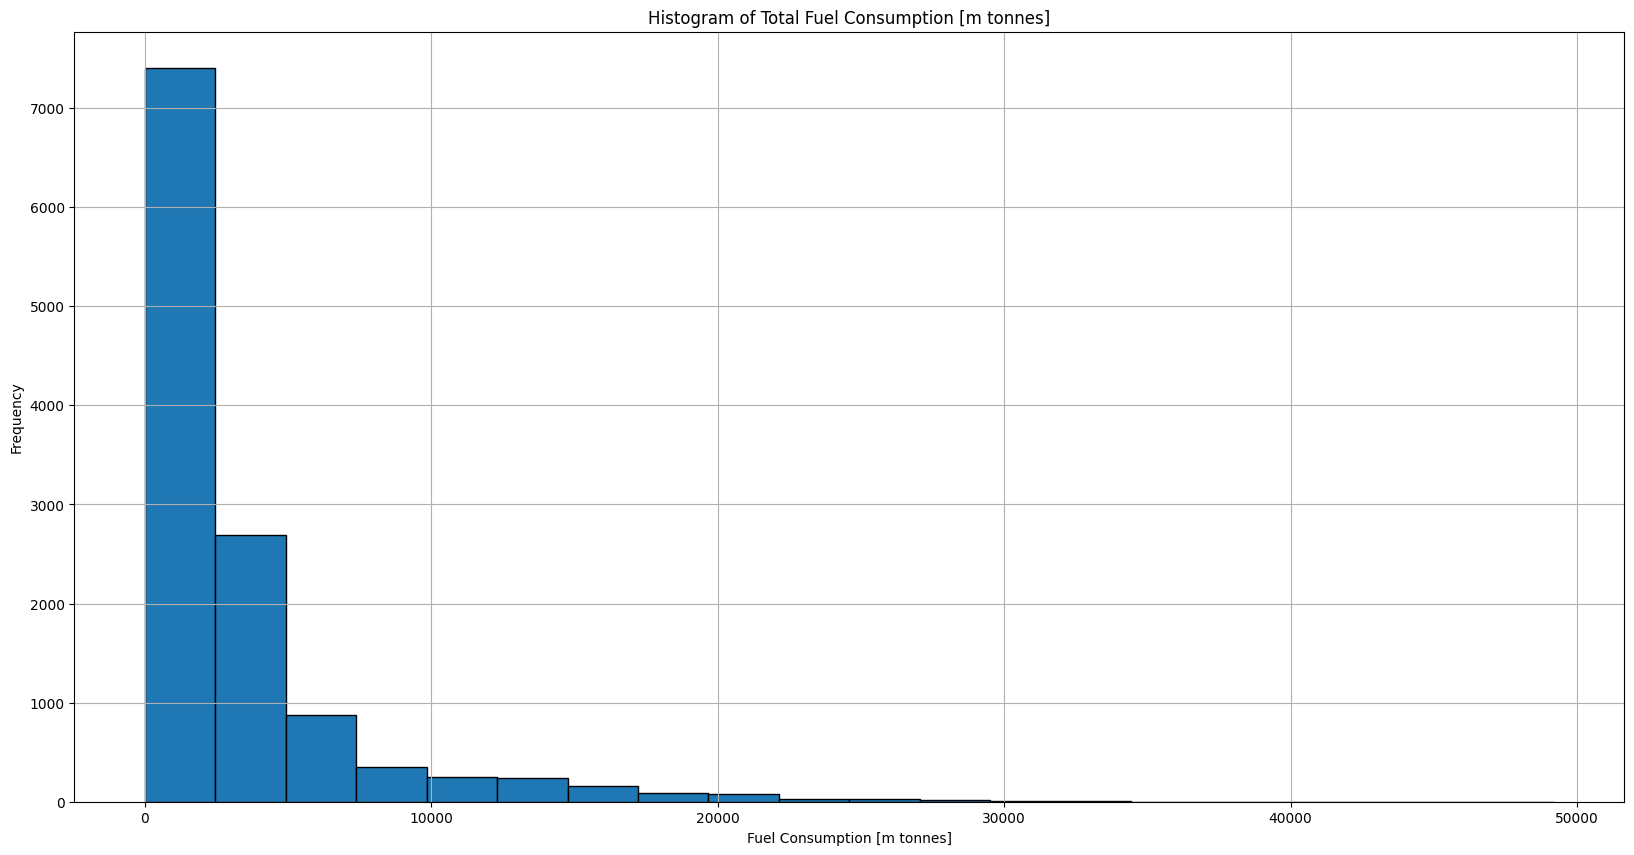

In [13]:
# Histogram for a numeric column (e.g., 'Total fuel consumption [m tonnes]')
plt.figure(figsize=(20, 10))
df['Total fuel consumption [m tonnes]'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Total Fuel Consumption [m tonnes]')
plt.xlabel('Fuel Consumption [m tonnes]')
plt.ylabel('Frequency')
plt.show()


Histograms help us understand the distribution of a single numeric column. Here, we plot a histogram for the `Total fuel consumption [m tonnes]` column. The plot shows the frequency of different fuel consumption values, providing insight into the overall distribution.


### Boxplot of CO₂ Emissions


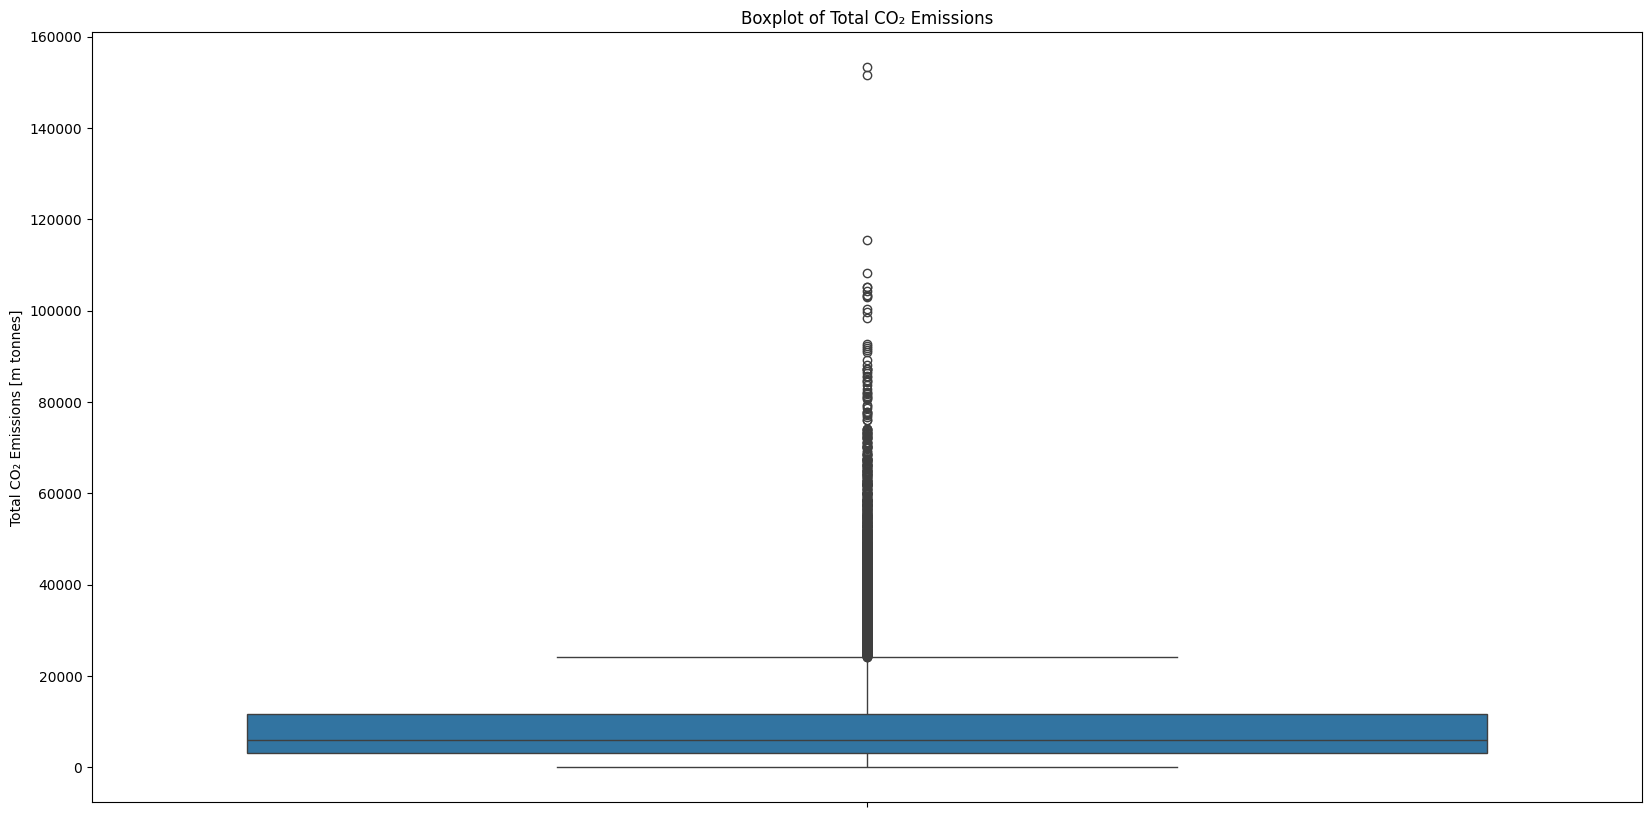

In [14]:
# Boxplot for CO2 Emissions (e.g., 'Total CO₂ emissions [m tonnes]')
plt.figure(figsize=(20, 10))
sns.boxplot(y=df['Total CO₂ emissions [m tonnes]'])
plt.title('Boxplot of Total CO₂ Emissions')
plt.ylabel('Total CO₂ Emissions [m tonnes]')
plt.show()


Boxplots are useful for identifying the spread of a dataset and detecting potential outliers. We use a boxplot to visualize the distribution of the `Total CO₂ emissions [m tonnes]` column, highlighting the range, quartiles, and any outliers present in the data.


### Scatter Plot: Fuel Consumption vs CO₂ Emissions


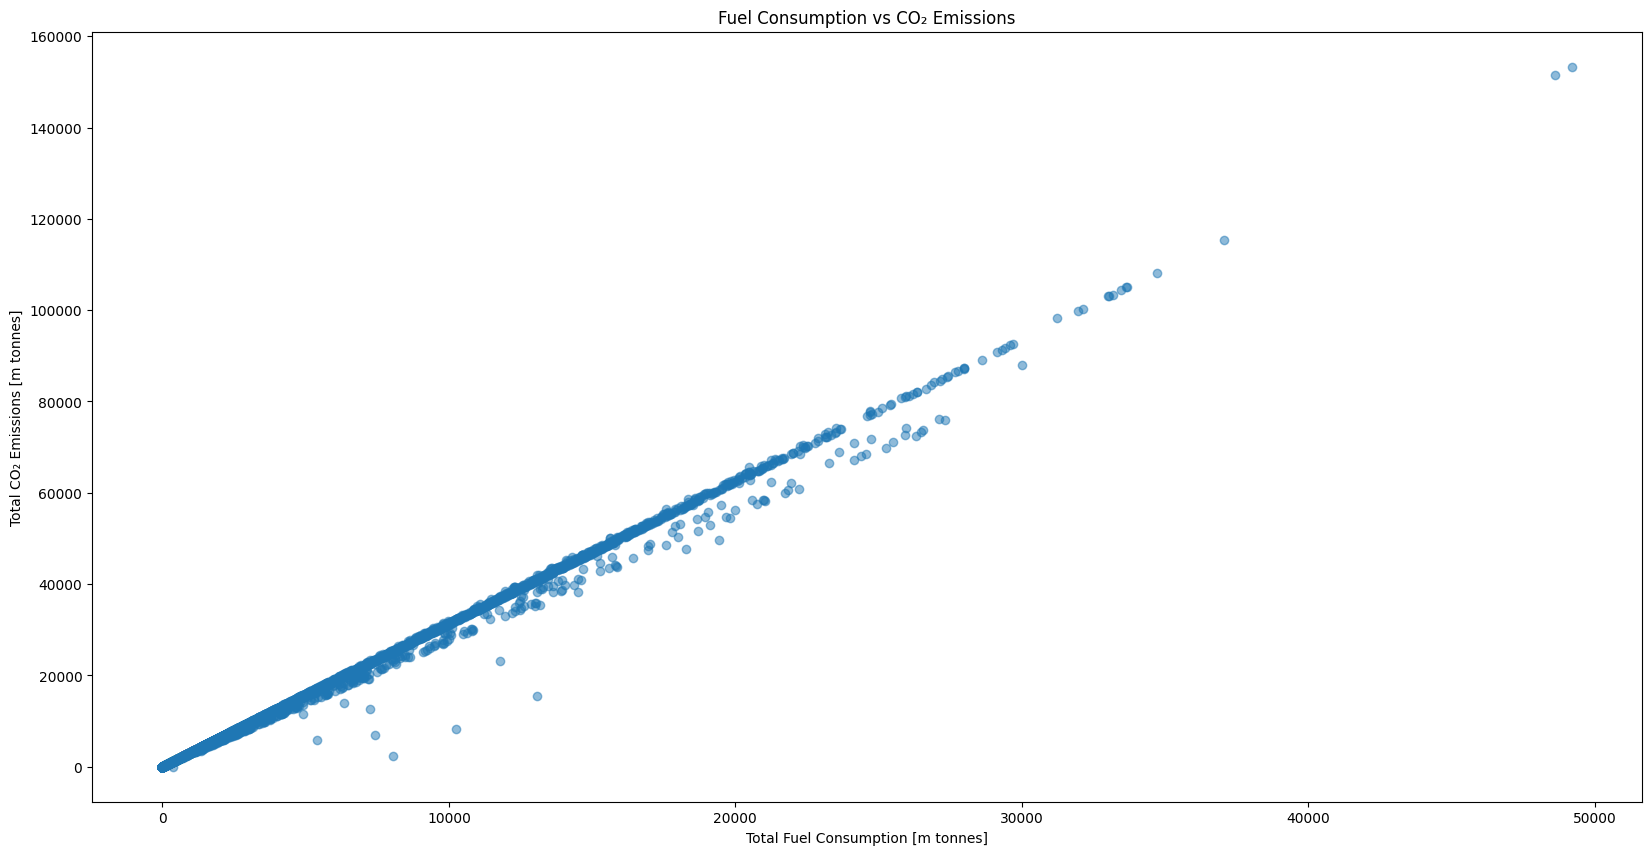

In [15]:
# Scatter plot: Fuel Consumption vs CO2 Emissions
plt.figure(figsize=(20, 10))
plt.scatter(df['Total fuel consumption [m tonnes]'], df['Total CO₂ emissions [m tonnes]'], alpha=0.5)
plt.title('Fuel Consumption vs CO₂ Emissions')
plt.xlabel('Total Fuel Consumption [m tonnes]')
plt.ylabel('Total CO₂ Emissions [m tonnes]')
plt.show()


Scatter plots are ideal for visualizing the relationship between two numeric variables. Here, we plot `Total fuel consumption [m tonnes]` against `Total CO₂ emissions [m tonnes]`. This helps us explore whether a linear relationship exists between fuel consumption and CO₂ emissions.


### Pairplot for Visualizing Multiple Relationships


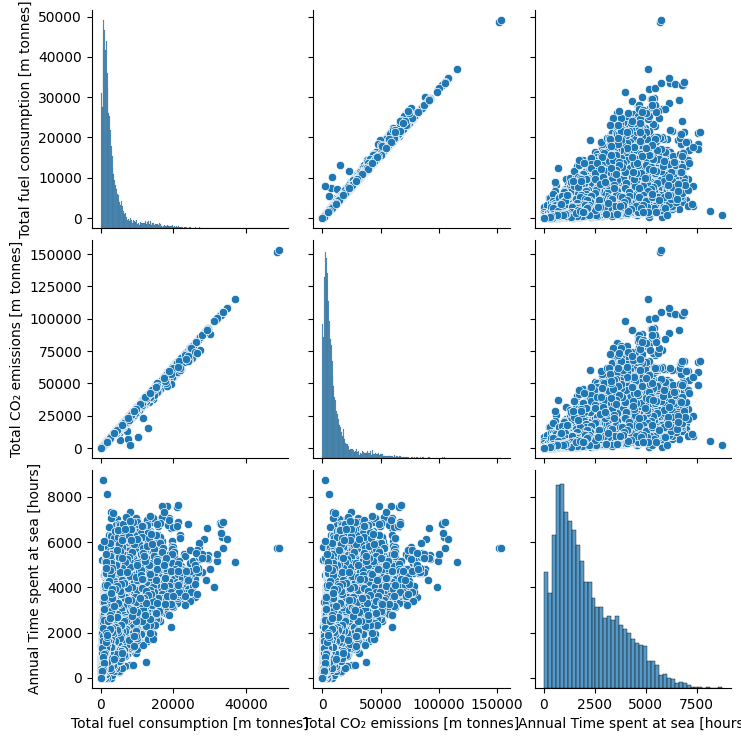

In [16]:
# Pairplot for visualizing relationships between multiple features
sns.pairplot(df[['Total fuel consumption [m tonnes]', 'Total CO₂ emissions [m tonnes]', 'Annual Time spent at sea [hours]']])
plt.show()


Pairplots allow us to visualize pairwise relationships between multiple columns. In this case, we use a pairplot to explore relationships between `Total fuel consumption [m tonnes]`, `Total CO₂ emissions [m tonnes]`, and `Annual Time spent at sea [hours]`. Each plot shows how one variable relates to another, while diagonal plots show the distribution of individual variables.


### Bar Plot: Average Speed by Ship Type


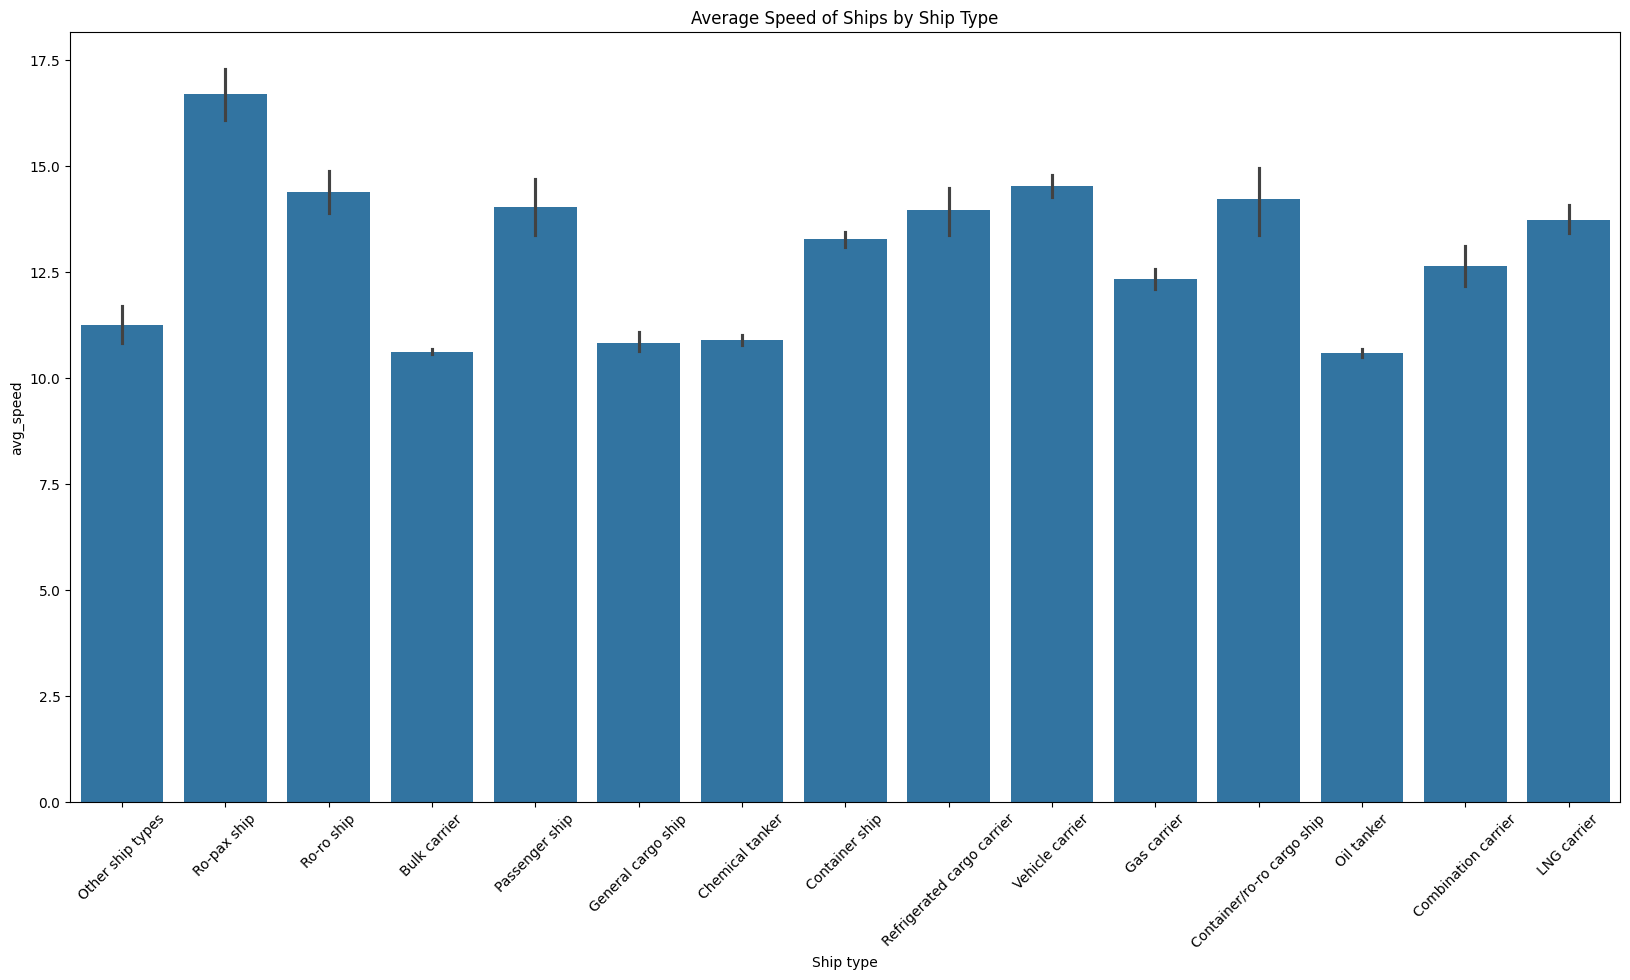

In [17]:
# Bar plot to visualize the average speed of ships by ship type (if available)
df['avg_speed'] = pd.to_numeric(df['avg_speed'], errors='coerce')
plt.figure(figsize=(20, 10))
sns.barplot(x='Ship type', y='avg_speed', data=df)
plt.title('Average Speed of Ships by Ship Type')
plt.xticks(rotation=45)
plt.show()


Bar plots are useful for comparing values across categories. In this case, we visualize the average speed of ships, grouped by their `Ship type`. This allows us to observe how different ship types vary in terms of their average speeds.


### Data Preparation and Scaling

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is the original dataset
# Step 1: Clean and prepare the dataset
df_cleaned = df[['Total fuel consumption [m tonnes]', 'Annual Time spent at sea [hours]', 'avg_speed', 'deadweight', 'Total CO₂ emissions [m tonnes]']].copy()

# Fill missing values with the mean for all numeric columns
df_cleaned.loc[:, :] = df_cleaned.fillna(df_cleaned.mean())

# Convert 'avg_speed' column to numeric, handling any conversion issues
df_cleaned.loc[:, 'avg_speed'] = pd.to_numeric(df_cleaned['avg_speed'], errors='coerce')

# Drop any rows where the target variable 'Total CO₂ emissions [m tonnes]' is missing
df_cleaned = df_cleaned.dropna(subset=['Total CO₂ emissions [m tonnes]'])

# Step 2: Select features and target
features = ['Total fuel consumption [m tonnes]', 'Annual Time spent at sea [hours]', 'avg_speed', 'deadweight']
target = 'Total CO₂ emissions [m tonnes]'
X = df_cleaned[features]
y = df_cleaned[target]

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


First, we need to clean the dataset by handling missing values, converting data types, and filtering out unnecessary columns.

### Building the ANN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN model
model = Sequential()

# Add layers to the model
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))  # First hidden layer
model.add(Dense(units=32, activation='relu'))  # Second hidden layer
model.add(Dense(units=1, activation='linear'))  # Output layer for regression (carbon emissions)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


c:\Users\Ibrahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 268926720.0000 - val_loss: 264640496.0000
Epoch 2/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 277912608.0000 - val_loss: 241460864.0000
Epoch 3/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 241335152.0000 - val_loss: 194211264.0000
Epoch 4/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 194004144.0000 - val_loss: 150843968.0000
Epoch 5/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 147837408.0000 - val_loss: 132337008.0000
Epoch 6/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 135671936.0000 - val_loss: 126326600.0000
Epoch 7/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 130099024.0000 - val_loss: 121733048.0000
Epoch 8/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 116074616.0000 - val_loss: 116983576.0000
Epoch 9/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 123259256.0000 - val_loss: 111836696.0000
Epoch 10/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 10314

Define the architecture of the network. A simple ANN consists of an input layer, one or more hidden layers, and an output layer.

The input layer has one node per feature.
The hidden layers can vary in number of nodes and layers.
The output layer will have one node since we're predicting a single continuous value (carbon emissions).

### Evaluating the ANN

#### Making Predictions

In [27]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step


Once the model is trained, you can use the model.predict() function to make predictions on the test set.

#### Evaluate the Model Performance

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 451206.5708045278
R² Score: 0.9971512980838424


MSE of 451206.57: This is quite a large value in absolute terms, but its significance depends on the scale of the target variable (in your case, carbon emissions). MSE penalizes larger errors more heavily because of the squaring, so if your predictions are off by large margins in some cases, it can inflate the MSE.
However, despite the large MSE, it is still useful to compare it against other models. The absolute value might not be as important if the R² score is high, which leads us to the next metric.

R² score of 0.997: This is an excellent score, indicating that your model explains about 99.7% of the variance in the target variable (carbon emissions). This means that your model is doing a great job of capturing the relationships between the features and carbon emissions.
In other words, your model's predictions are very close to the actual values, and only a small percentage (0.3%) of the variance in the data is left unexplained by the model.


#### Visualizing the result

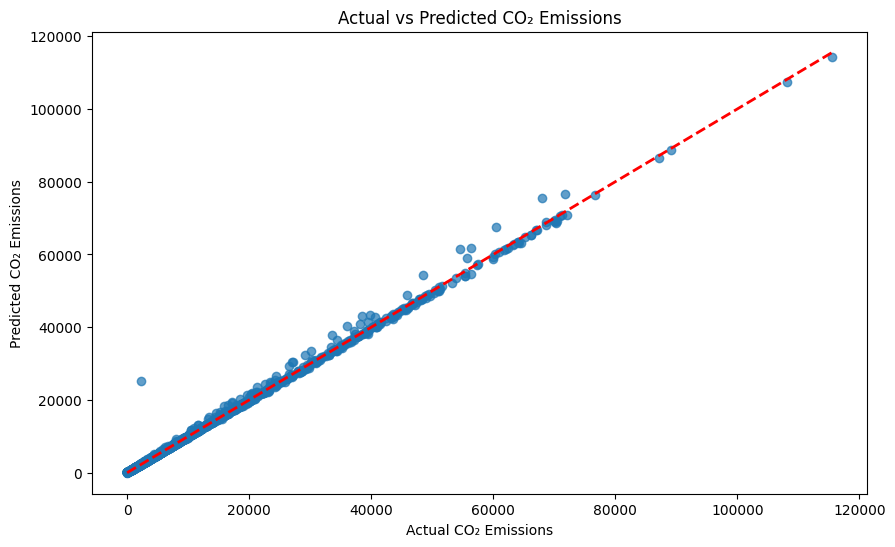

In [29]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual CO₂ Emissions')
plt.ylabel('Predicted CO₂ Emissions')
plt.title('Actual vs Predicted CO₂ Emissions')
plt.show()
